<a href="https://colab.research.google.com/github/aid4mh/QPrism/blob/main/tests/Sensor/APD_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This notebook tests the correctness of APD using a real sensor (accelerometer) data.

In [1]:
! python3 -m pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 30.9 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


#Install the dependencies and QPrism

In [ ]:
! pip install -r https://raw.githubusercontent.com/aid4mh/QPrism/main/requirements.txt

In [34]:
! pip install --no-deps QPrism

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
from QPrism.Sensor.DQM import DQM_single_record
from QPrism.Sensor.load_data import *

#Import the read data, then compute the DQM for it.

In [50]:
from urllib.request import urlopen
import json
import pandas as pd

response = urlopen("https://raw.githubusercontent.com/aid4mh/QPrism/main/data/sensor/json/SUBJ00001_Accelerometer_REC000005.json")
json_data = response.read().decode('utf-8', 'replace')

json_file = json.loads(json_data)
json_file = json.dumps(list(json_file['records']))
df = (pd.read_json(json_file))
df[list(df.keys())[0]] = df[list(df.keys())[0]].apply(lambda x: x.value)
print(df)

                timestamp         x         y         z
0     1593965108713000000 -0.418985  8.166622 -5.542577
1     1593965108914000000 -0.469264  8.145074 -5.604826
2     1593965109115000000 -0.490811  8.154651 -5.590461
3     1593965109335000000 -0.502782  8.183381 -5.499481
4     1593965109539000000 -0.505177  8.190564 -5.379771
...                   ...       ...       ...       ...
1957  1593965596247000000 -1.824382  9.028535 -3.433285
1958  1593965596467000000 -1.769315  9.021352 -3.402161
1959  1593965596687000000 -1.704672  9.006987 -3.603274
1960  1593965596898000000 -1.460463  9.047688 -3.129222
1961  1593965597115000000 -1.726219  9.009381 -3.411737

[1962 rows x 4 columns]


#Create the DQM_single_file object, set the input data frame, then compute DQM

In [51]:
single_json_file_dqm = DQM_single_record()
single_json_file_dqm.set_input_data(df)
single_json_file_dqm.compute_DQM()

#First we get the APD score of the record

In [52]:
single_json_file_dqm.get_APD()

'0.020387359836901122'

#Now we get the index of the anomaly points.

In [53]:
single_json_file_dqm.get_anomaly_index()

[8,
 9,
 77,
 142,
 152,
 155,
 158,
 161,
 205,
 206,
 208,
 209,
 210,
 528,
 825,
 842,
 868,
 870,
 875,
 1006,
 1030,
 1031,
 1214,
 1412,
 1413,
 1436,
 1438,
 1439,
 1440,
 1442,
 1462,
 1836,
 1837,
 1838,
 1839,
 1840,
 1841,
 1842,
 1844,
 1846]

#The computed APD score should be the lenth of categorized anomaly points divided by the length of the record.

In [54]:
len(single_json_file_dqm.get_anomaly_index())/(df.shape[0])

0.020387359836901122

#Now we justified the correctness of APD score computation, then we show that the computed data points are actually anomaly points.
#First we preprocess the raw data for the visulization.

In [55]:
from QPrism.Sensor.pipeline_functions.preprocessing import *
feature_names = list(df.keys())
feature_names.remove(feature_names[0])
record = features_to_float(df, feature_names)
print(record)

                timestamp         x         y         z
0     1593965108713000000 -0.418985  8.166622 -5.542577
1     1593965108914000000 -0.469264  8.145074 -5.604826
2     1593965109115000000 -0.490811  8.154651 -5.590461
3     1593965109335000000 -0.502782  8.183381 -5.499481
4     1593965109539000000 -0.505177  8.190564 -5.379771
...                   ...       ...       ...       ...
1957  1593965596247000000 -1.824382  9.028535 -3.433285
1958  1593965596467000000 -1.769315  9.021352 -3.402161
1959  1593965596687000000 -1.704672  9.006987 -3.603274
1960  1593965596898000000 -1.460463  9.047688 -3.129222
1961  1593965597115000000 -1.726219  9.009381 -3.411737

[1962 rows x 4 columns]


#Now we visulize the record with the anomaly points highlighted.

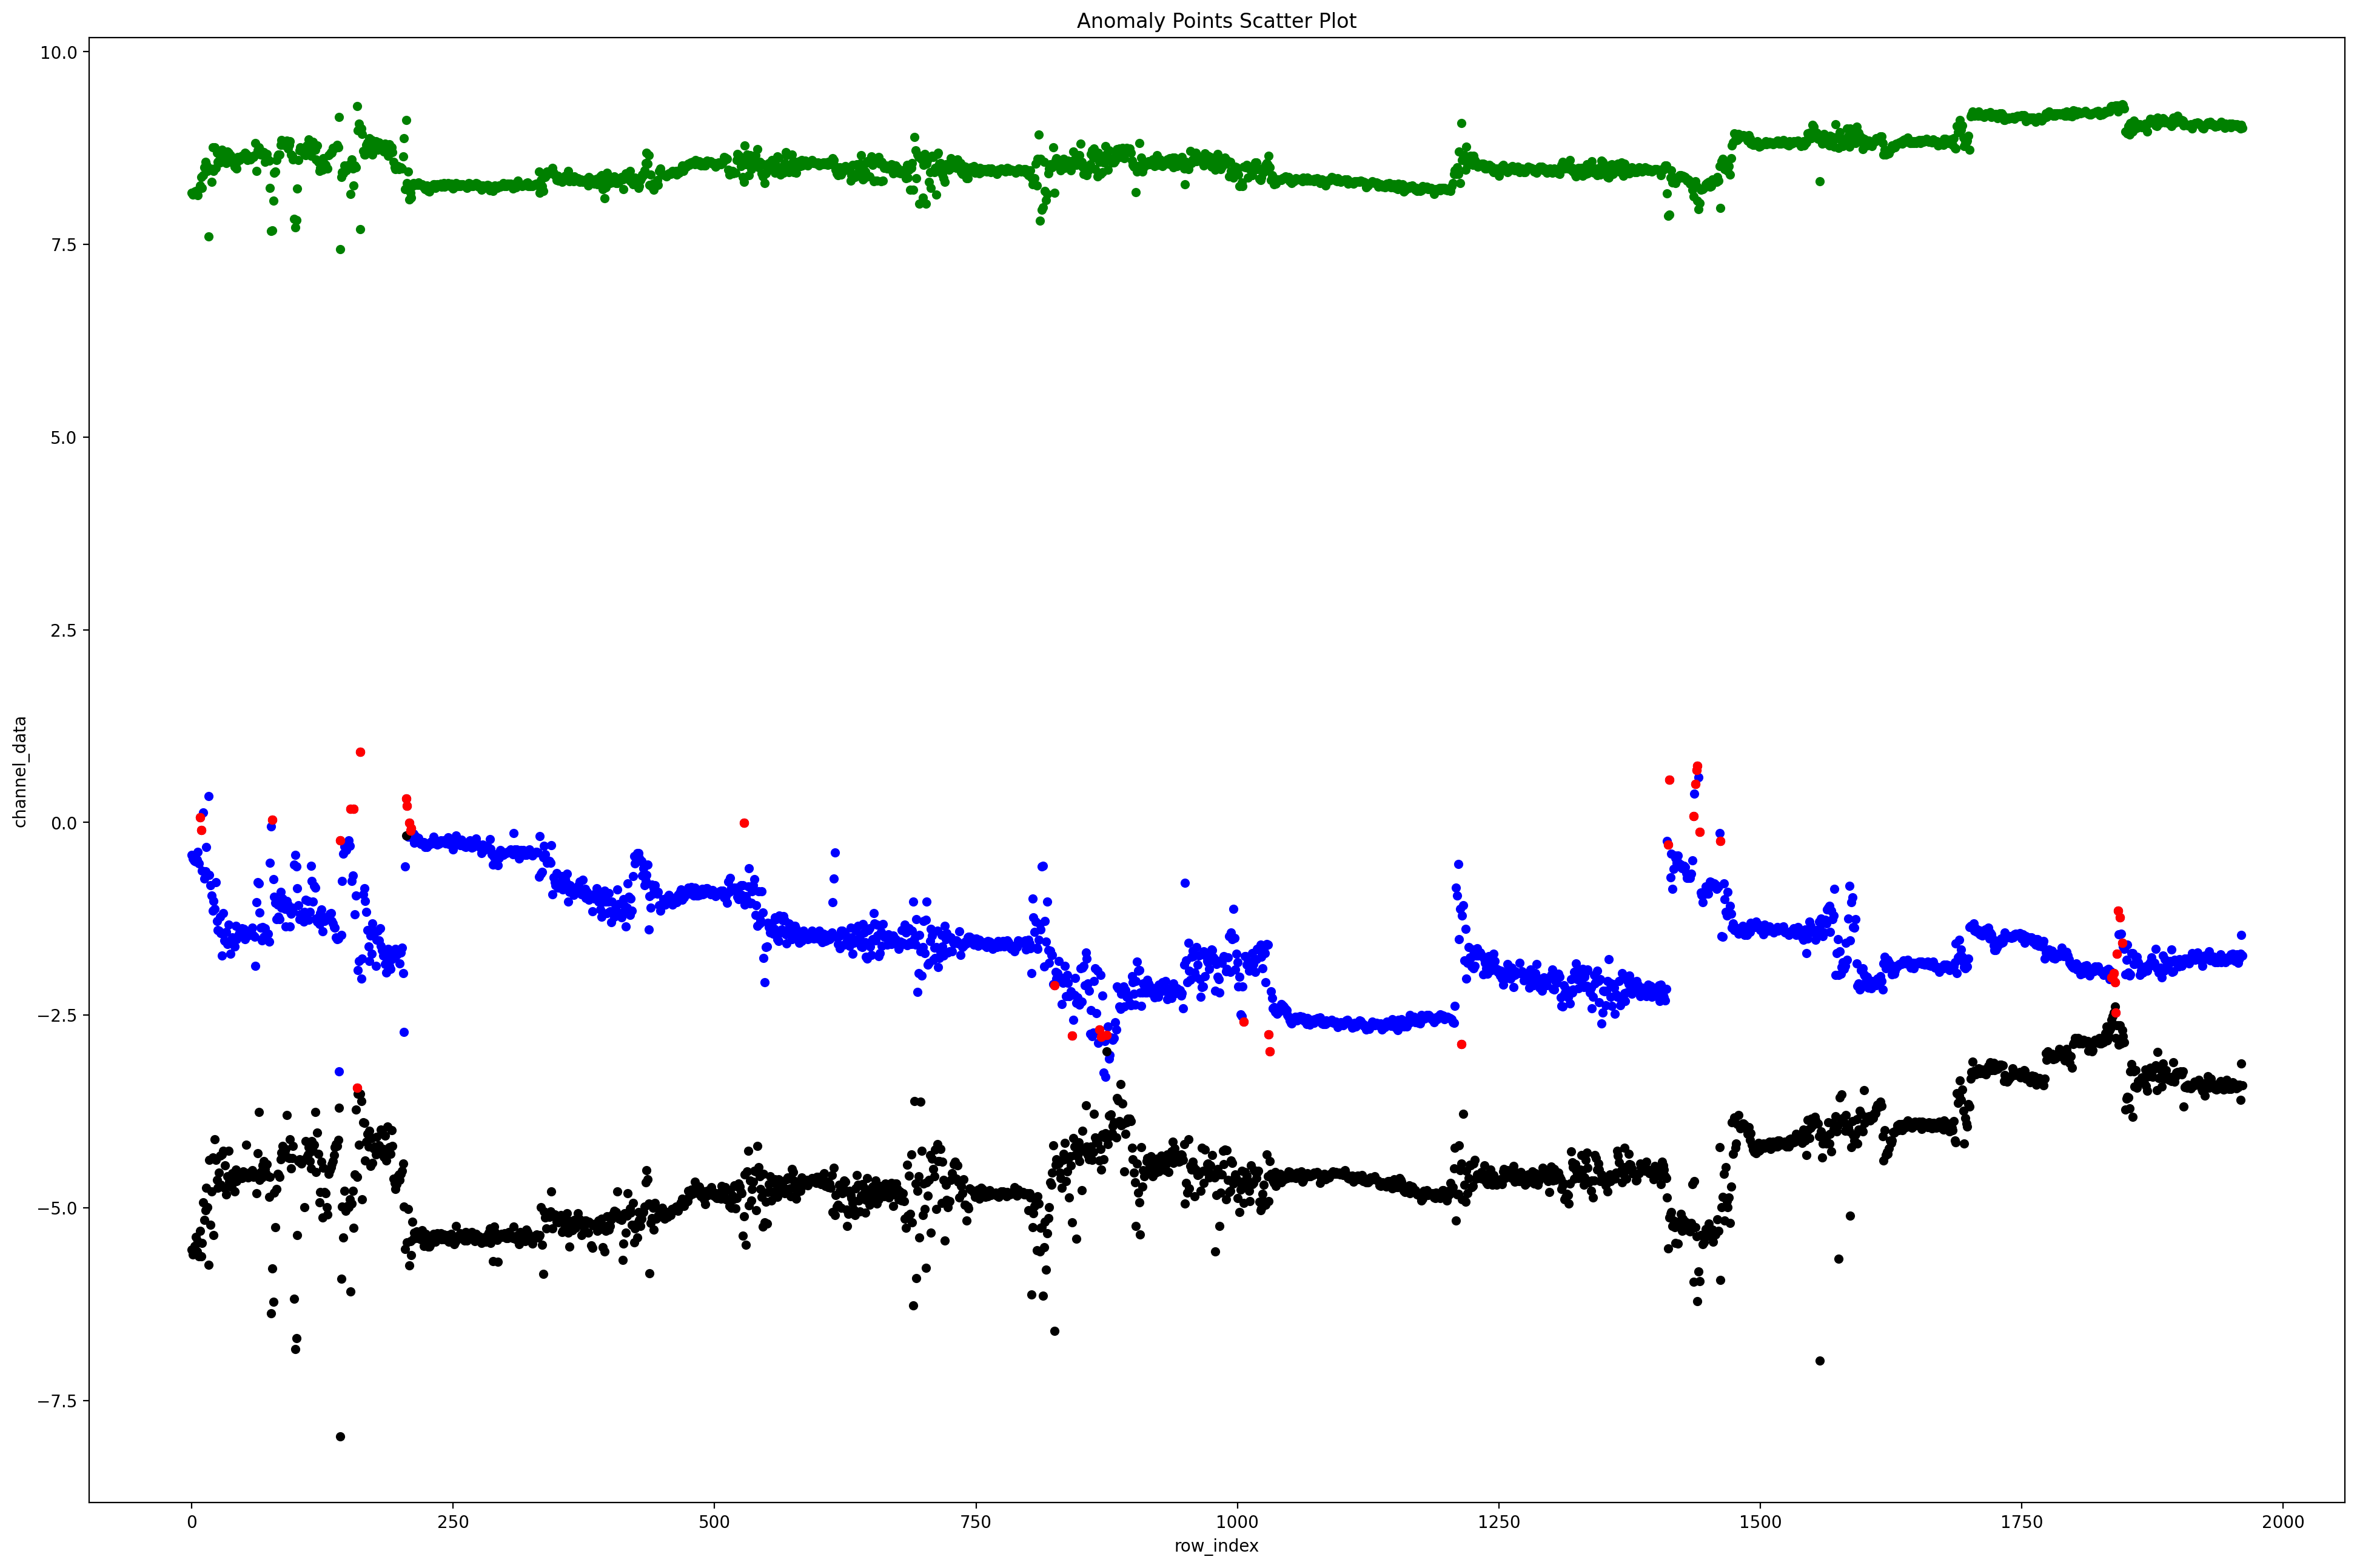

In [56]:
import matplotlib.pyplot as plt

index = [range(record['x'].shape[0])]
plt.scatter(index, record['x'], color='blue', s=20)
plt.scatter(index, record['y'], color='green', s=20)
plt.scatter(index, record['z'], color='black', s=20)
plt.xlabel('row_index')
plt.ylabel('channel_data')
plt.title('Anomaly Points Scatter Plot')
anomaly_index = single_json_file_dqm.get_anomaly_index()
anomaly_x_value = []
anomaly_y_value = []
anomaly_z_value = []
for i in anomaly_index:
    anomaly_x_value.append(record['x'].iloc[i])
    anomaly_y_value.append(record['x'].iloc[i])
    anomaly_z_value.append(record['x'].iloc[i])
plt.scatter(anomaly_index, anomaly_x_value, color='red', s=20)
plt.scatter(anomaly_index, anomaly_y_value, color='red', s=20)
plt.scatter(anomaly_index, anomaly_z_value, color='red', s=20)
plt.rcParams['figure.figsize'] = [24, 16]
plt.rcParams['figure.dpi'] = 200
plt.show()